In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
data = pd.read_excel(r'C:\Users\HP\Documents\Wine Classification(Major)\VB\Wine_Classification_Major_Project.xlsx')

In [3]:
# number of rows & columns in the dataset
data.shape

(1599, 12)

In [4]:
#checkimg missing values
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    1
density                 0
pH                      1
sulphates               0
alcohol                 0
quality                 1
dtype: int64

In [5]:
#getting data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1598 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1598 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1598 non-null   float64
dtypes: float64(12)
memory usage: 150.0 KB


In [6]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1598.000000,1599.000000,1598.000000,1599.000000,1599.000000,1598.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.433041,0.996747,3.498586,0.658149,10.422983,5.636421
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.876249,0.001887,0.080346,0.169507,1.065668,0.807665
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.520000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.520000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.520000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,3.900000,2.000000,14.900000,8.000000


In [7]:
#getting values from the columns with null values
data[data['total sulfur dioxide'].isna() | data['pH'].isna() | data['quality'].isna()]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
9,7.5,0.50,0.36,6.1,0.071,17.0,NaN,0.9978,3.35,0.80,10.5,5.0
123,8.0,0.71,0.00,2.6,0.080,11.0,34.0,0.9976,3.44,0.53,9.5,NaN
184,6.7,0.62,0.21,1.9,0.079,8.0,62.0,0.9970,NaN,0.58,9.3,6.0


In [8]:
#dropping the 3 null values rows to get appropriate data frame
data.dropna(inplace = True)
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5.0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5.0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6.0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.52,0.58,10.5,5.0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6.0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.52,0.75,11.0,6.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.52,0.71,10.2,5.0


In [9]:
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

C:\Users\HP\Documents\Tools\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


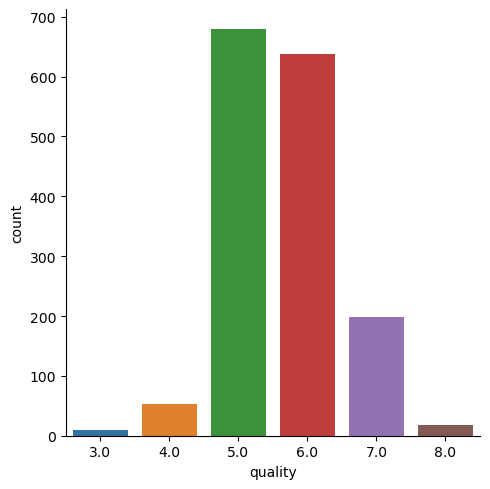

In [10]:
# number of values for each quality
sns.catplot(x='quality', data = data, kind = 'count')

<Axes: xlabel='quality', ylabel='volatile acidity'>

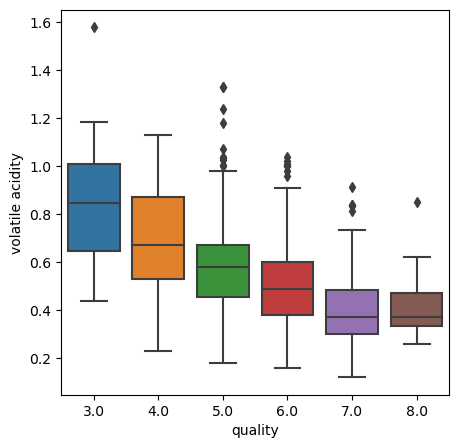

In [11]:
# volatile acidity vs Quality
plot = plt.figure(figsize=(5,5))
sns.boxplot(x='quality', y = 'volatile acidity', data = data)

<Axes: xlabel='quality', ylabel='fixed acidity'>

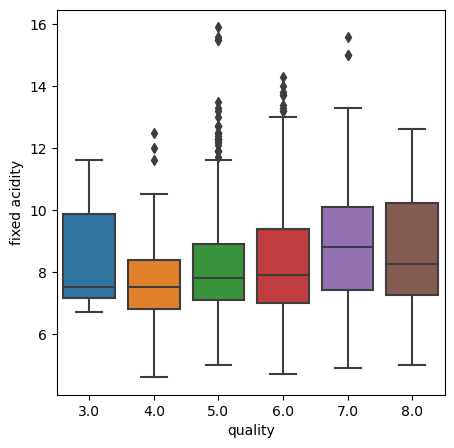

In [12]:
# fixed acidity vs Quality
plot = plt.figure(figsize=(5,5))
sns.boxplot(x='quality', y = 'fixed acidity', data = data)

<Axes: xlabel='quality', ylabel='pH'>

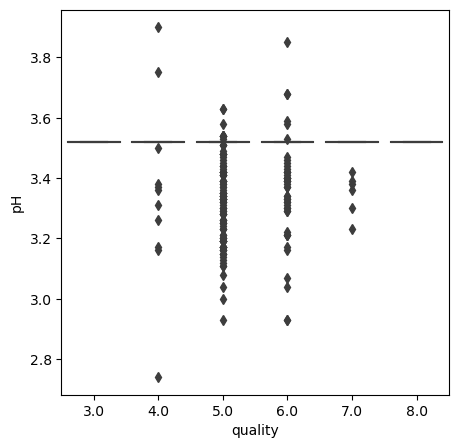

In [13]:
# pH vs Quality
plot = plt.figure(figsize=(5,5))
sns.boxplot(x='quality', y = 'pH', data = data)

<Axes: xlabel='quality', ylabel='citric acid'>

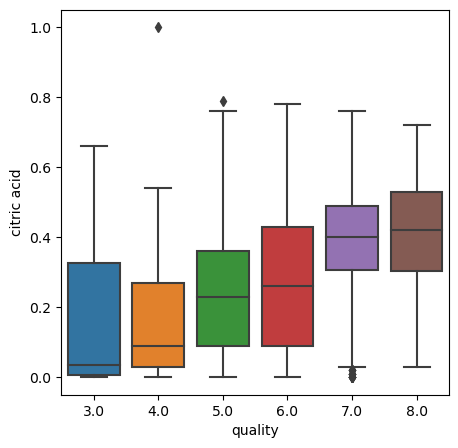

In [14]:
# citric acid vs Quality
plot = plt.figure(figsize=(5,5))
sns.boxplot(x='quality', y = 'citric acid', data = data)

<Axes: xlabel='quality', ylabel='residual sugar'>

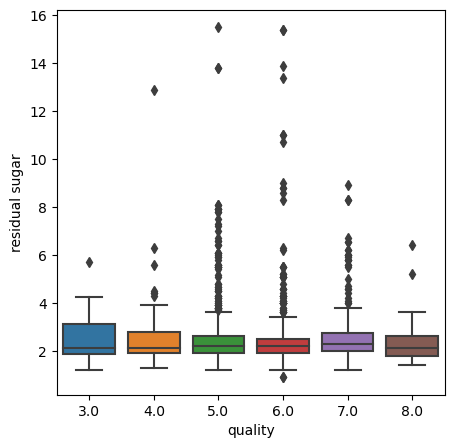

In [15]:
# residual sugar vs Quality
plot = plt.figure(figsize=(5,5))
sns.boxplot(x='quality', y = 'residual sugar', data = data)

<Axes: xlabel='quality', ylabel='chlorides'>

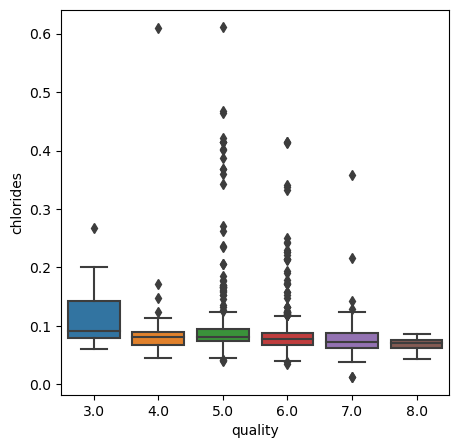

In [16]:
#chlorides vs Quality
plot = plt.figure(figsize=(5,5))
sns.boxplot(x='quality', y = 'chlorides', data = data)

<Axes: xlabel='quality', ylabel='total sulfur dioxide'>

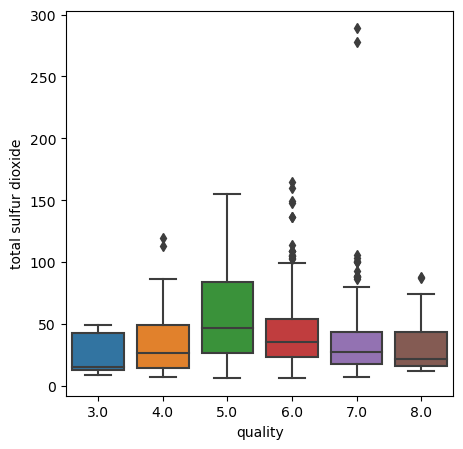

In [17]:
#total so2 vs Quality
plot = plt.figure(figsize=(5,5))
sns.boxplot(x='quality', y = 'total sulfur dioxide', data = data)

<Axes: xlabel='quality', ylabel='alcohol'>

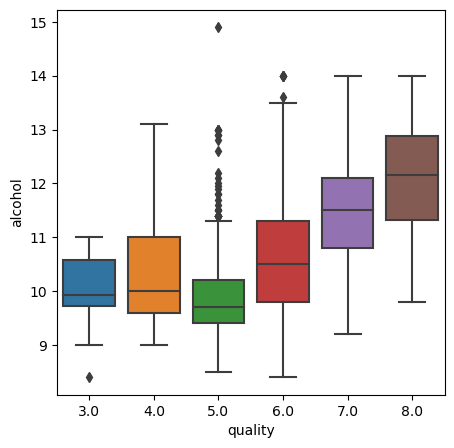

In [18]:
#total alcohol vs Quality
plot = plt.figure(figsize=(5,5))
sns.boxplot(x='quality', y = 'alcohol', data = data)

In [19]:
#From these Graphs we see correlation to be negative or positive between the quality of the wine and various data features

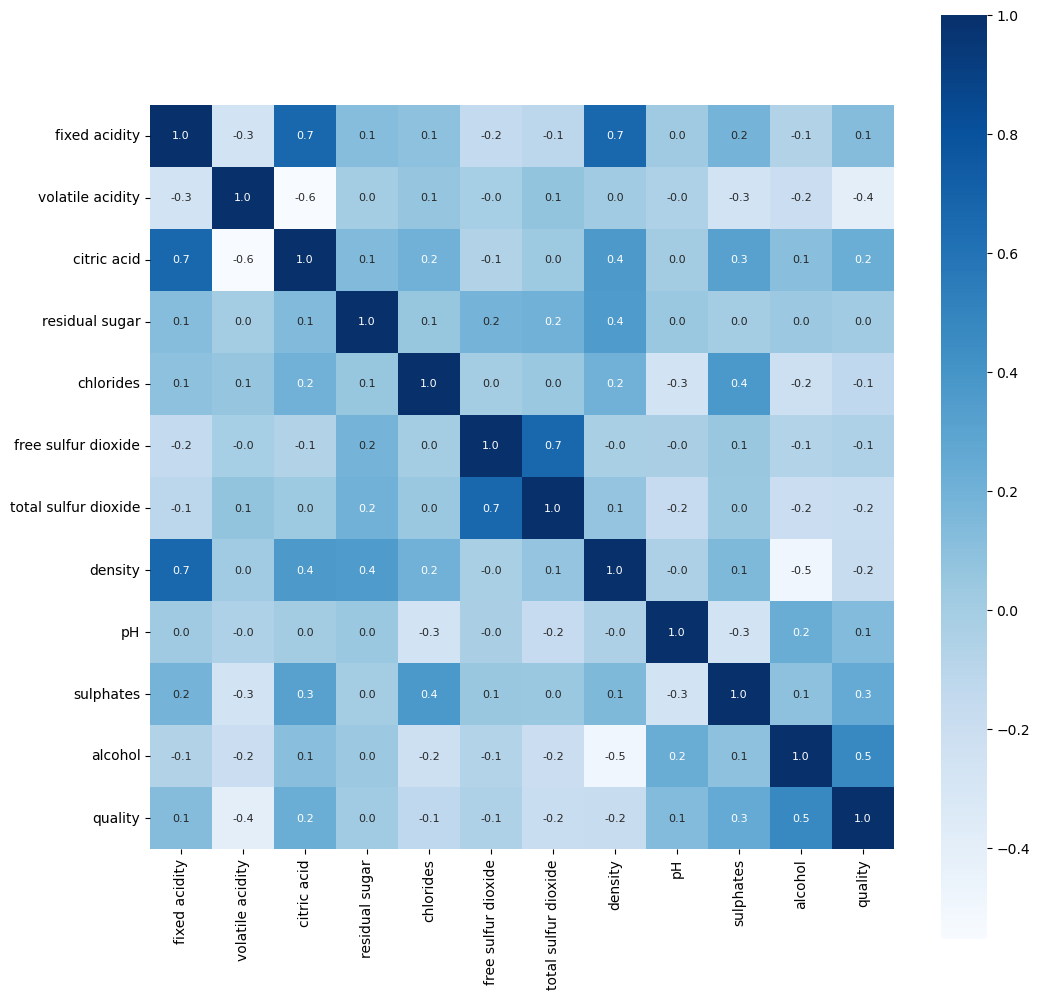

In [20]:
##Heatmap
correlation = data.corr()
# constructing a heatmap to understand the correlation between the columns
plt.figure(figsize=(12,12))
sns.heatmap(correlation, cbar=True, square=True, fmt = '.1f', annot = True, annot_kws={'size':8}, cmap = 'Blues')
plt.show()

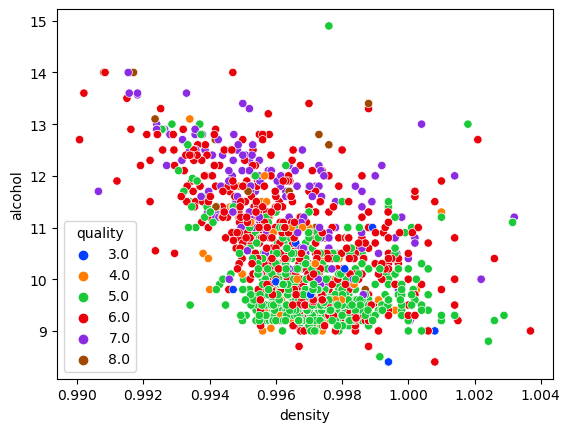

In [21]:
#constructing a scatterplot
plt.clf()
sns.scatterplot(data=data, x='density', y='alcohol', hue='quality', palette="bright")
plt.show()

## Data Preprocessing

In [22]:
# separate the data and Label
X = data.drop('quality',axis=1)
print(X)
y = data['quality']
print(y)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

In [23]:
##Importing 'train_test_split' and Splitting the Dataset into Train and Test Sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=3)
#Creating an instance of StandardScaler and Fit transform the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [24]:
## Creating and Fitting Isolation Model and Filtering Outliers from training data
from sklearn.ensemble import IsolationForest
outlier_detector = IsolationForest(contamination=0.1)
outliers = outlier_detector.fit_predict(X_train_scaled)
X_train_no_outliers = X_train_scaled[outliers == 1]
y_train_no_outliers = y_train[outliers == 1]

In [25]:
from sklearn.feature_selection import SelectKBest, f_regression
k = 5
selector = SelectKBest(score_func=f_regression, k=k)
X_train_selected = selector.fit_transform(X_train_no_outliers, y_train_no_outliers)
X_test_selected = selector.transform(X_test_scaled)


In [26]:
X_test_selected.shape, X_train_selected.shape

((160, 5), (1292, 5))

In [27]:
## Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=50, random_state=3)
classifier.fit(X_train_selected, y_train_no_outliers)
y_pred = classifier.predict(X_test_selected)

In [28]:
# accuracy on test data
test_data_accuracy = accuracy_score(y_pred, y_test)
print('Accuracy : ', test_data_accuracy)

Accuracy :  0.7125


In [29]:
#Classification metrics can't handle a mix of continuous and multiclass targets

In [30]:
## When dealing with Regression tasks
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100, random_state=3)
regressor.fit(X_train_selected, y_train_no_outliers)
y_pred_reg = regressor.predict(X_test_selected)

In [31]:
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

         3.0       0.00      0.00      0.00         1
         4.0       0.00      0.00      0.00         5
         5.0       0.75      0.88      0.81        69
         6.0       0.69      0.69      0.69        61
         7.0       0.67      0.45      0.54        22
         8.0       0.50      0.50      0.50         2

    accuracy                           0.71       160
   macro avg       0.43      0.42      0.42       160
weighted avg       0.69      0.71      0.69       160

Confusion Matrix:
[[ 0  0  1  0  0  0]
 [ 0  0  3  2  0  0]
 [ 0  0 61  8  0  0]
 [ 0  1 14 42  4  0]
 [ 0  0  2  9 10  1]
 [ 0  0  0  0  1  1]]


C:\Users\HP\Documents\Tools\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\Documents\Tools\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\Documents\Tools\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [32]:
print("Mean Squared Error for Regression:")
print(mean_squared_error(y_test, y_pred_reg))

Mean Squared Error for Regression:
0.26470937499999997


In [33]:
def accuracy(y_true, y_pred):
    errors = abs(y_true - y_pred)
    mape = 100*np.mean(errors/y_true)
    accuracy = 100 - mape
    return accuracy

print('\n','accuracy:')
accuracy(y_test, y_pred_reg)


 accuracy:


93.0099181547619

# Building machine learning model

In [34]:
#Linear Regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [35]:
from sklearn.metrics import mean_squared_error,r2_score
def metrics(y_true, y_pred):
    print(f'RMSE :',mean_squared_error(y_true, y_pred)**0.5)
    print(f'R_squared :', r2_score(y_true, y_pred))

In [36]:
y_pred = model.predict(X_test)
print('\n','accuracy:')
accuracy(y_test, y_pred)


 accuracy:


91.48982379324416

In [37]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor
model_random_forest = RandomForestRegressor(n_estimators=500, min_samples_split=3)
model_random_forest.fit(X_train, y_train)

RandomForestRegressor(min_samples_split=3, n_estimators=500)

In [38]:
pred_rf = model_random_forest.predict(X_test)

In [39]:
metrics(y_test, pred_rf)

RMSE : 0.492026211770883
R_squared : 0.6426718921481833


In [40]:
accuracy(y_test, pred_rf)

93.30082366071429

In [41]:
## Building a Predictive System
input_data = (7.5,0.5,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.8,10.5)

# changing the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the data as we are predicting the label for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]==1):
  print('Good Quality Wine')
else:
  print('Bad Quality Wine')

[5.57611944]
Bad Quality Wine


C:\Users\HP\Documents\Tools\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
